# ECG Classification by CNN

# 0. Mounting

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential, layers, optimizers
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/ECG/')

# 1. Dataset Overview

- Number of Samples: 14,552

- Number of Categories: 2

- Sampling Frequency: 125Hz
- Data Source: Physionet's PTB Diagnostic Database

- https://www.physionet.org/content/ptbdb/1.0.0/


In [4]:
data_no = pd.read_csv('./ptbdb_normal.csv')
data_ab = pd.read_csv('./ptbdb_abnormal.csv')

In [5]:
data_no = np.array(data_no)
data_ab = np.array(data_ab)
data_no

array([[1.        , 0.79468149, 0.37538651, ..., 0.        , 0.        ,
        0.        ],
       [0.90902895, 0.79148209, 0.42316866, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.47889334, 0.05675984, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.87257439, 0.46507114, ..., 0.        , 0.        ,
        0.        ],
       [0.91598314, 0.52937263, 0.2884061 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.83864295, 0.39056683, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
data_no.shape

(4045, 188)

In [7]:
data_ab.shape

(10505, 188)

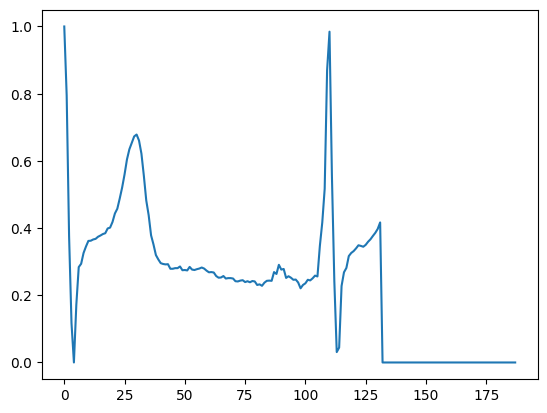

In [8]:
plt.plot(data_no[0,:])

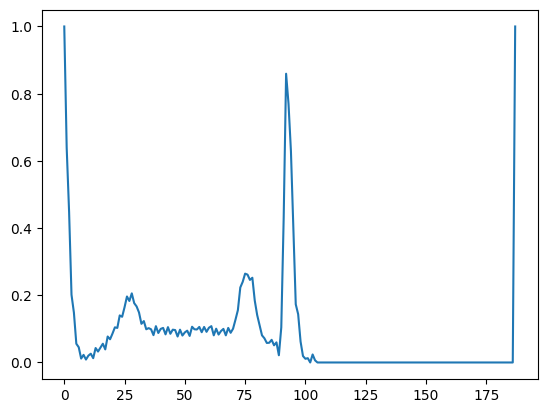

In [9]:
plt.plot(data_ab[100,:])

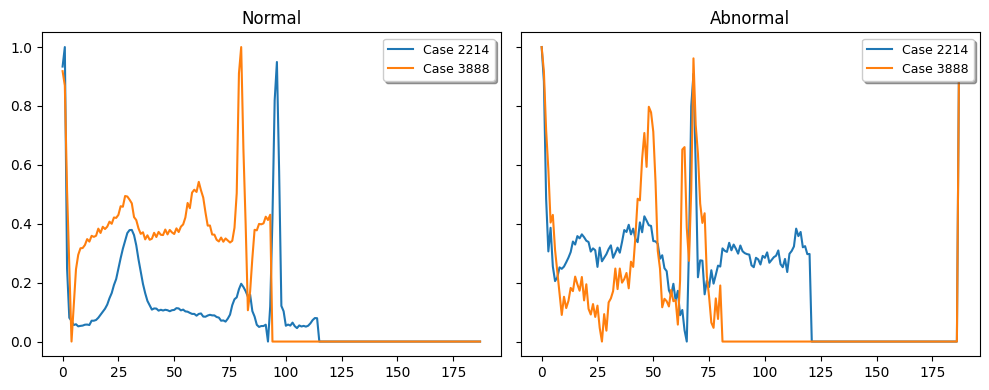

In [10]:
index = np.random.randint(0, len(data_no), 2)

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
ax[0].plot(data_no[index[0], :], label=f"Case {index[0]}")
ax[0].plot(data_no[index[1], :], label=f"Case {index[1]}")
ax[0].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
ax[0].set_title("Normal")

ax[1].plot(data_ab[index[0], :], label=f"Case {index[0]}")
ax[1].plot(data_ab[index[1], :], label=f"Case {index[1]}")
ax[1].legend(shadow=True, frameon=True, facecolor="inherit", loc=1, fontsize=9)
ax[1].set_title("Abnormal")

plt.tight_layout()
plt.show()

train data 생성

In [34]:
nTrain = 3000
nTest = 1000

In [35]:
x_train  = np.concatenate((data_no[:nTrain,:], data_ab[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain), np.ones(nTrain)), 0)

In [36]:
x_train.shape

(6000, 188)

In [37]:
y_train.shape

(6000,)

Test data 생성

In [38]:
x_test  = np.concatenate((data_no[nTrain:nTrain+nTest,:], data_ab[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest), np.ones(nTest)), 0)

In [39]:
x_test.shape

(2000, 188)

In [40]:
# one hot encoding
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [41]:
x_train.shape

(6000, 188, 1)

In [42]:
y_train = to_categorical(y_train)

In [43]:
y_test = to_categorical(y_test)

In [44]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [45]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

모델링

In [46]:
# CNN + LSTM
model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, input_shape=(x_train.shape[1], 1), activation='relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3, strides=2))
model.add(layers.LSTM(16))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs = 50, batch_size=128, validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 7s 113ms/step - loss: 0.6192 - accuracy: 0.6740 - val_loss: 0.6361 - val_accuracy: 0.6525
Epoch 2/50
38/38 [==============================] - 3s 88ms/step - loss: 0.5762 - accuracy: 0.7113 - val_loss: 0.6829 - val_accuracy: 0.6008
Epoch 3/50
38/38 [==============================] - 3s 86ms/step - loss: 0.5776 - accuracy: 0.7085 - val_loss: 0.6347 - val_accuracy: 0.6467
Epoch 4/50
38/38 [==============================] - 3s 89ms/step - loss: 0.5704 - accuracy: 0.7140 - val_loss: 0.7775 - val_accuracy: 0.5417
Epoch 5/50
38/38 [==============================] - 3s 84ms/step - loss: 0.5588 - accuracy: 0.7196 - val_loss: 0.7066 - val_accuracy: 0.5983
Epoch 6/50
38/38 [==============================] - 2s 55ms/step - loss: 0.5479 - accuracy: 0.7256 - val_loss: 0.7993 - val_accuracy: 0.4792
Epoch 7/50
38/38 [==============================] - 3s 83ms/step - loss: 0.5341 - accuracy: 0.7496 - val_loss: 1.0941 - val_accuracy: 0.3192
Epoch 8/50
3

In [48]:
o = model.predict(x_test)

63/63 [==============================] - 1s 9ms/step


In [49]:
o = np.argmax(o, 1)

In [50]:
y_test = np.argmax(y_test, 1)

In [51]:
# 예측
o

array([0, 0, 0, ..., 1, 1, 1])

In [52]:
# 실제
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
# Accuracy
sum(o == y_test) / len(o) * 100

93.8

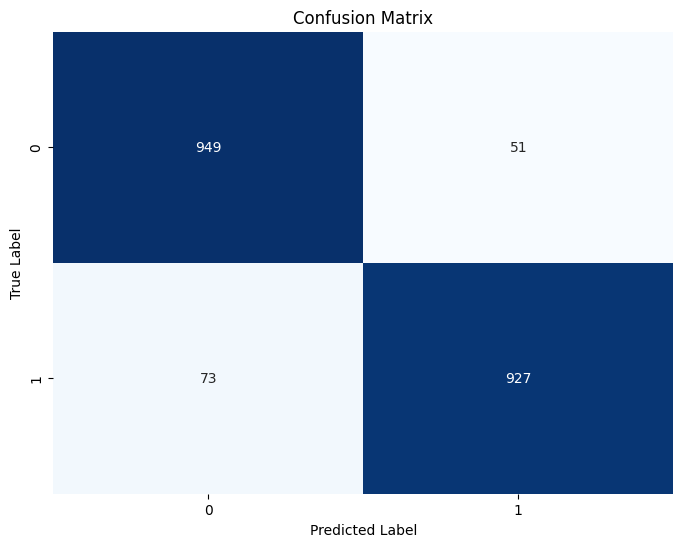

In [58]:
cm = confusion_matrix(y_test, o)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()